In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pymer4.models import Lmer

In [3]:
df = pd.read_pickle('./papers_2016_all_validread_forregression_dropNaN_disruption2plus.pickle') 
df.rename({'partition_1e-06': 'field'},axis=1, inplace=True)
df_hcp = df[df['label_hml_2021'].isin([1])]

In [4]:
df.head()

,eid,authids,subjs,doi,doctype,journal,c_history,c_history_sum,c_normalized_1e-06,CD,...,n_countries,n_authors,auth_prestige_log,capacity_log,jif_log,D_nok_log,n_authors_log,n_countries_log,cumulative_reader_2018_binary,cumulative_reader_2021_binary
0,30420578.0,"[7401604158, 7403998927, 6602495853]","[EART, AGRI, ENVI]",10.25268/BIMC.INVEMAR.1996.25.0.372,ar,26787.0,"[1, 0, 0, 1, 1, 3]",6.0,0.429694,0.733333,...,1,3,0.418710,0.219211,0.157186,0.810930,1.386294,0.693147,0,0
1,27745748.0,"[7006179489, 7004601936]","[CHEM, BIOC]",10.1002/elps.11501401200,ar,23524.0,"[0, 0, 0, 0, 0, 0]",0.0,0.000000,NaN,...,1,2,0.193887,0.054964,1.280801,0.336472,1.098612,0.693147,0,0
4,31649304.0,"[57226262203, 7004413192]","[ENGI, COMP, MATH]",10.1108/09615539810198069,ar,16215.0,"[0, 1, 1, 2, 1, 0]",5.0,0.432460,0.520000,...,1,2,0.284961,0.160536,1.000632,0.733969,1.098612,0.693147,0,0
7,30438581.0,"[7005287214, 7005287214, 6602076660]","[EART, AGRI, ENVI]",10.25268/BIMC.INVEMAR.1996.25.0.370,ar,26787.0,"[0, 0, 1, 0, 1, 1]",3.0,0.214847,0.733333,...,2,2,0.095626,0.529677,0.157186,0.980829,1.098612,1.098612,0,0
10,28918535.0,"[7005821154, 7007042161, 7007042161]",[MEDI],10.1111/j.1365-2133.1995.tb05019.x,ar,24267.0,"[12, 18, 12, 3, 6, 7]",58.0,5.971418,0.379310,...,1,2,0.223144,0.164684,1.389630,0.634678,1.098612,0.693147,1,1


In [5]:
df.columns

Index(['eid', 'authids', 'subjs', 'doi', 'doctype', 'journal', 'c_history',
       'c_history_sum', 'c_normalized_1e-06', 'CD', 'field',
       'c_history_sum_2018', 'jif', 'partition_0.0005', 'partition_ASJC',
       'cumulative_reader_2016', 'cumulative_reader_2017',
       'cumulative_reader_2018', 'cumulative_reader_2019',
       'cumulative_reader_2020', 'cumulative_reader_2021',
       'cumulative_reader_2022', 'read_percite_2016', 'read_percite_2017',
       'read_percite_2018', 'read_percite_2019', 'read_percite_2020',
       'read_percite_2021', 'read_percite_2022', 'auth_prestige', 'D_nok',
       'label_hml_2018', 'label_hml_2021', 'capacity', 'c_history_sum_2016',
       'c_history_sum_2017', 'c_history_sum_2019', 'c_history_sum_2020',
       'c_history_sum_2021', 'cumulative_reader_2018_log',
       'cumulative_reader_2021_log', 'c_history_sum_2018_log',
       'c_history_sum_log', 'countries', 'n_countries', 'n_authors',
       'auth_prestige_log', 'capacity_log', 'jif_lo

In [6]:
df.shape

(2288086, 54)

- 目的変数(4種) ~ 説明変数(2^6通り) かつデータ(HCPか全体か)で数百通りある

# Random Effect

## Full model

In [7]:
# 2021_cite ~ auth, jif, D, capacity, author, country

_df = df.copy()
_df = _df.dropna(subset=['label_hml_2021','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2021 ~ auth_prestige_log + jif_log + D_nok_log + capacity_log + n_authors_log + n_countries_log + (1 | field)",
             data=_df[["label_hml_2021","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2021~auth_prestige_log+jif_log+D_nok_log+capacity_log+n_authors_log+n_countries_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 1986873	 Groups: {'field': 66.0}

Log-likelihood: -578311.456 	 AIC: 1156638.912

Random effects:

              Name    Var    Std
field  (Intercept)  0.635  0.797

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-8.512,-8.703,-8.321,0.097,0.000,0.000,0.000,0.000,0.000,0.000,-87.353,0.0,***
auth_prestige_log,1.665,1.640,1.691,0.013,5.288,5.157,5.423,0.841,0.838,0.844,129.900,0.0,***
jif_log,1.767,1.757,1.777,0.005,5.853,5.795,5.913,0.854,0.853,0.855,344.700,0.0,***
D_nok_log,-0.033,-0.049,-0.017,0.008,0.968,0.952,0.983,0.492,0.488,0.496,-3.976,0.0,***
capacity_log,7.308,7.246,7.371,0.032,1492.797,1402.385,1589.037,0.999,0.999,0.999,229.273,0.0,***
n_authors_log,0.224,0.214,0.235,0.005,1.252,1.238,1.265,0.556,0.553,0.558,41.283,0.0,***
n_countries_log,0.491,0.473,0.508,0.009,1.633,1.604,1.663,0.620,0.616,0.624,53.731,0.0,***


In [11]:
# 2018_cite ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy()
_df = _df.dropna(subset=['label_hml_2018','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2018 ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log + n_authors_log + n_countries_log + (1 | field)",
             data=_df[["label_hml_2018","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2018~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+n_authors_log+n_countries_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -97464.060 	 AIC: 194946.121

Random effects:

              Name    Var    Std
field  (Intercept)  3.298  1.816

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-14.814,-15.300,-14.328,0.248,0.000,0.000,0.000,0.000,0.000,0.000,-59.750,0.0,***
c_history_sum_log,4.378,4.325,4.431,0.027,79.675,75.569,84.004,0.988,0.987,0.988,162.171,0.0,***
auth_prestige_log,0.653,0.592,0.715,0.031,1.922,1.808,2.044,0.658,0.644,0.671,20.829,0.0,***
jif_log,0.469,0.447,0.492,0.011,1.599,1.563,1.635,0.615,0.610,0.621,40.841,0.0,***
D_nok_log,-0.701,-0.749,-0.652,0.025,0.496,0.473,0.521,0.332,0.321,0.343,-28.166,0.0,***
capacity_log,-0.947,-1.101,-0.792,0.079,0.388,0.332,0.453,0.280,0.249,0.312,-11.969,0.0,***
n_authors_log,0.197,0.172,0.221,0.013,1.217,1.187,1.248,0.549,0.543,0.555,15.471,0.0,***
n_countries_log,0.120,0.078,0.162,0.021,1.127,1.081,1.176,0.530,0.519,0.540,5.601,0.0,***


In [12]:
# # 2021_read ~ auth, jif, D, capacity, author, country

# _df = df_hcp.copy()
# _df = _df.dropna(subset=['cumulative_reader_2021_binary','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

# model = Lmer(
#              "cumulative_reader_2021_binary ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log + n_authors_log + n_countries_log + (1 | field)",
#              data=_df[["cumulative_reader_2021_binary","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
#     family = 'binomial'
# )

# model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: cumulative_reader_2021_binary~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+n_authors_log+n_countries_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -138178.339 	 AIC: 276374.678

Random effects:

              Name    Var   Std
field  (Intercept)  0.846  0.92

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-9.730,-9.982,-9.477,0.129,0.000,0.000,0.000,0.000,0.000,0.000,-75.546,0.000,***
c_history_sum_log,2.380,2.353,2.408,0.014,10.808,10.513,11.111,0.915,0.913,0.917,168.550,0.000,***
auth_prestige_log,0.780,0.733,0.828,0.024,2.182,2.080,2.288,0.686,0.675,0.696,32.192,0.000,***
jif_log,0.346,0.328,0.365,0.009,1.414,1.388,1.440,0.586,0.581,0.590,37.303,0.000,***
D_nok_log,0.973,0.931,1.015,0.021,2.646,2.538,2.758,0.726,0.717,0.734,45.829,0.000,***
capacity_log,-0.043,-0.172,0.086,0.066,0.958,0.842,1.090,0.489,0.457,0.522,-0.651,0.515,
n_authors_log,-0.287,-0.306,-0.267,0.010,0.751,0.736,0.766,0.429,0.424,0.434,-28.625,0.000,***
n_countries_log,0.577,0.545,0.610,0.017,1.781,1.724,1.841,0.640,0.633,0.648,34.502,0.000,***


In [13]:
# 2018_read ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy()
_df = _df.dropna(subset=['cumulative_reader_2018_binary','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "cumulative_reader_2018_binary ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log + n_authors_log + n_countries_log + (1 | field)",
             data=_df[["cumulative_reader_2018_binary","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: cumulative_reader_2018_binary~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+n_authors_log+n_countries_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -148231.872 	 AIC: 296481.743

Random effects:

              Name    Var    Std
field  (Intercept)  0.491  0.701

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.100,-7.298,-6.902,0.101,0.001,0.001,0.001,0.001,0.001,0.001,-70.191,0.000,***
c_history_sum_log,1.567,1.545,1.589,0.011,4.793,4.689,4.900,0.827,0.824,0.831,139.043,0.000,***
auth_prestige_log,1.017,0.972,1.062,0.023,2.765,2.642,2.893,0.734,0.725,0.743,43.932,0.000,***
jif_log,0.594,0.577,0.612,0.009,1.812,1.780,1.844,0.644,0.640,0.648,66.377,0.000,***
D_nok_log,0.301,0.261,0.341,0.020,1.352,1.299,1.407,0.575,0.565,0.584,14.820,0.000,***
capacity_log,-0.158,-0.282,-0.034,0.063,0.854,0.754,0.966,0.461,0.430,0.491,-2.499,0.012,*
n_authors_log,-0.266,-0.285,-0.247,0.010,0.766,0.752,0.781,0.434,0.429,0.438,-27.831,0.000,***
n_countries_log,0.517,0.486,0.547,0.016,1.676,1.625,1.729,0.626,0.619,0.634,32.753,0.000,***


## Limited variables

In [14]:
# 2021_cite ~ auth, jif, D, capacity, author, country

_df = df.copy()
_df = _df.dropna(subset=['label_hml_2021','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2021 ~ auth_prestige_log + jif_log + D_nok_log + capacity_log  + (1 | field)",
             data=_df[["label_hml_2021","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2021~auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 1986873	 Groups: {'field': 66.0}

Log-likelihood: -581958.500 	 AIC: 1163929.000

Random effects:

              Name    Var   Std
field  (Intercept)  0.562  0.75

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.783,-7.964,-7.601,0.093,0.000,0.000,0.000,0.000,0.000,0.000,-84.104,0.0,***
auth_prestige_log,1.819,1.794,1.843,0.013,6.163,6.012,6.317,0.860,0.857,0.863,144.062,0.0,***
jif_log,1.810,1.800,1.820,0.005,6.111,6.050,6.173,0.859,0.858,0.861,354.761,0.0,***
D_nok_log,-0.054,-0.070,-0.038,0.008,0.947,0.932,0.963,0.486,0.482,0.490,-6.575,0.0,***
capacity_log,7.259,7.197,7.321,0.032,1420.463,1335.165,1511.210,0.999,0.999,0.999,229.734,0.0,***


In [15]:
# 2018_cite ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy()
_df = _df.dropna(subset=['label_hml_2018','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2018 ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log + (1 | field)",
             data=_df[["label_hml_2018","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2018~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -97662.707 	 AIC: 195339.415

Random effects:

              Name    Var    Std
field  (Intercept)  3.174  1.782

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-14.420,-14.899,-13.940,0.245,0.000,0.000,0.000,0.000,0.000,0.000,-58.972,0.0,***
c_history_sum_log,4.371,4.318,4.424,0.027,79.118,75.045,83.412,0.988,0.987,0.988,162.099,0.0,***
auth_prestige_log,0.737,0.676,0.799,0.031,2.090,1.966,2.222,0.676,0.663,0.690,23.641,0.0,***
jif_log,0.491,0.469,0.514,0.011,1.635,1.599,1.672,0.620,0.615,0.626,43.019,0.0,***
D_nok_log,-0.718,-0.767,-0.669,0.025,0.488,0.465,0.512,0.328,0.317,0.339,-28.911,0.0,***
capacity_log,-0.903,-1.058,-0.748,0.079,0.405,0.347,0.473,0.288,0.258,0.321,-11.425,0.0,***


In [17]:
# 2018_read ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy()
_df = _df.dropna(subset=['cumulative_reader_2018_binary','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "cumulative_reader_2018_binary ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log +  (1 | field)",
             data=_df[["cumulative_reader_2018_binary","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: cumulative_reader_2018_binary~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -148891.683 	 AIC: 297797.366

Random effects:

              Name    Var    Std
field  (Intercept)  0.535  0.731

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.056,-7.259,-6.853,0.104,0.001,0.001,0.001,0.001,0.001,0.001,-68.125,0.0,***
c_history_sum_log,1.580,1.558,1.602,0.011,4.857,4.751,4.965,0.829,0.826,0.832,140.650,0.0,***
auth_prestige_log,1.019,0.974,1.064,0.023,2.770,2.648,2.897,0.735,0.726,0.743,44.474,0.0,***
jif_log,0.582,0.564,0.599,0.009,1.789,1.758,1.820,0.641,0.637,0.645,65.556,0.0,***
D_nok_log,0.280,0.240,0.320,0.020,1.323,1.272,1.377,0.570,0.560,0.579,13.838,0.0,***
capacity_log,-0.284,-0.407,-0.160,0.063,0.753,0.665,0.852,0.430,0.400,0.460,-4.502,0.0,***


# Mixed Effect

## cite_2021

In [21]:
%%time

_df = df.copy()
_df = _df.dropna(subset=['label_hml_2021','auth_prestige_log','capacity_log','jif_log','D_nok_log','field'])

print('start model')
model = Lmer(
             "label_hml_2021 ~ auth_prestige_log + (auth_prestige_log | field) + jif_log + (jif_log | field) + capacity_log +  (capacity_log | field) + D_nok_log + (D_nok_log | field) + 1 + (1 | field)",
             data=_df[["label_hml_2021","auth_prestige_log", "capacity_log", "jif_log","D_nok_log","field"]], 
    family = 'binomial'
)
print('start fit')
model.fit()

start model
start fit


/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2021~auth_prestige_log+(auth_prestige_log|field)+jif_log+(jif_log|field)+capacity_log+(capacity_log|field)+D_nok_log+(D_nok_log|field)+1+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 1986873	 Groups: {'field': 66.0}

Log-likelihood: -575206.683 	 AIC: 1150449.367

Random effects:

                      Name    Var    Std
field          (Intercept)  0.213  0.461
field    auth_prestige_log  0.323  0.568
field.1        (Intercept)  0.045  0.212
field.1            jif_log  0.189  0.434
field.2        (Intercept)  2.726  1.651
field.2       capacity_log  8.513  2.918
field.3        (Intercept)  0.029  0.170
field.3          D_nok_log  0.083  0.288
field.4        (Intercept)  0.000  0.013

                 IV1                IV2   Corr
field    (Intercept)  auth_prestige_log  0.786
field.1  (Intercept)            jif_log -1.000
field.2  (Intercept)       capacity_log -0.952
field.3  (In

,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.565,-7.831,-7.299,0.136,0.001,0.000,0.001,0.001,0.000,0.001,-55.772,0.0,***
auth_prestige_log,2.087,1.945,2.229,0.072,8.058,6.991,9.288,0.890,0.875,0.903,28.788,0.0,***
jif_log,1.900,1.795,2.004,0.053,6.683,6.021,7.418,0.870,0.858,0.881,35.694,0.0,***
capacity_log,6.565,6.156,6.974,0.209,709.671,471.515,1068.117,0.999,0.998,0.999,31.471,0.0,***
D_nok_log,-0.182,-0.256,-0.108,0.038,0.833,0.774,0.897,0.455,0.436,0.473,-4.839,0.0,***


## cite_2018

In [19]:
%%time

# 分野によって、切片も傾きも異なるモデル

_df = df_hcp.copy()
_df = _df.dropna(subset=['label_hml_2018','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','field'])

model = Lmer(
             "label_hml_2018 ~ c_history_sum_log + (c_history_sum_log | field) + auth_prestige_log + (auth_prestige_log | field) + capacity_log + (capacity_log | field) + jif_log + (jif_log | field) + D_nok_log + (D_nok_log | field) + 1 + (1 | field)",
             data=_df[["label_hml_2018","c_history_sum_log","auth_prestige_log", "capacity_log", "jif_log","D_nok_log","field"]], 
    family = 'binomial'
)

model.fit()

/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2018~c_history_sum_log+(c_history_sum_log|field)+auth_prestige_log+(auth_prestige_log|field)+capacity_log+(capacity_log|field)+jif_log+(jif_log|field)+D_nok_log+(D_nok_log|field)+1+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -96921.814 	 AIC: 193887.629

Random effects:

                      Name     Var    Std
field          (Intercept)  13.224  3.636
field    c_history_sum_log   0.615  0.784
field.1        (Intercept)   0.359  0.599
field.1  auth_prestige_log   0.081  0.285
field.2        (Intercept)   0.814  0.902
field.2       capacity_log   1.238  1.113
field.3        (Intercept)   0.892  0.945
field.3            jif_log   0.052  0.229
field.4        (Intercept)   0.107  0.328
field.4          D_nok_log   0.239  0.489
field.5        (Intercept)   0.001  0.028

                 IV1                IV2   Corr
field    (Intercep

,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-14.679,-15.608,-13.749,0.474,0.000,0.000,0.000,0.000,0.000,0.000,-30.955,0.000,***
c_history_sum_log,4.353,4.157,4.548,0.100,77.680,63.897,94.436,0.987,0.985,0.990,43.675,0.000,***
auth_prestige_log,0.771,0.645,0.896,0.064,2.161,1.906,2.450,0.684,0.656,0.710,12.043,0.000,***
capacity_log,-0.603,-0.954,-0.252,0.179,0.547,0.385,0.778,0.354,0.278,0.437,-3.364,0.001,***
jif_log,0.464,0.395,0.533,0.035,1.591,1.485,1.704,0.614,0.598,0.630,13.173,0.000,***
D_nok_log,-0.759,-0.899,-0.619,0.072,0.468,0.407,0.538,0.319,0.289,0.350,-10.619,0.000,***


## read_2018

In [20]:
%%time

_df = df_hcp.copy()
_df = _df.dropna(subset=['cumulative_reader_2018_binary','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','field'])

model = Lmer(
             "cumulative_reader_2018_binary ~ c_history_sum_log + (c_history_sum_log | field) + auth_prestige_log + (auth_prestige_log | field) + capacity_log + (capacity_log | field) + jif_log + (jif_log | field) + D_nok_log + (D_nok_log | field) + 1 + (1 | field)",
             data=_df[["cumulative_reader_2018_binary","c_history_sum_log","auth_prestige_log", "capacity_log", "jif_log","D_nok_log","field"]], 
    family = 'binomial'
)

_ = model.fit()

_

unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 1 negative eigenvalues 



/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:744: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_corrs = ran_corrs.applymap(


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: cumulative_reader_2018_binary~c_history_sum_log+(c_history_sum_log|field)+auth_prestige_log+(auth_prestige_log|field)+capacity_log+(capacity_log|field)+jif_log+(jif_log|field)+D_nok_log+(D_nok_log|field)+1+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 247078	 Groups: {'field': 66.0}

Log-likelihood: -146201.605 	 AIC: 292447.209

Random effects:

                      Name    Var    Std
field          (Intercept)  1.115  1.056
field    c_history_sum_log  0.108  0.328
field.1        (Intercept)  0.110  0.332
field.1  auth_prestige_log  0.876  0.936
field.2        (Intercept)  1.370  1.170
field.2       capacity_log  4.203  2.050
field.3        (Intercept)  0.000  0.000
field.3            jif_log  0.224  0.474
field.4        (Intercept)  0.135  0.367
field.4          D_nok_log  0.552  0.743
field.5        (Intercept)  0.007  0.081

                 IV1                IV2   Corr
field    (Inte

,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-7.429,-7.852,-7.005,0.216,0.001,0.000,0.001,0.001,0.000,0.001,-34.389,0.000,***
c_history_sum_log,1.573,1.485,1.660,0.045,4.819,4.415,5.260,0.828,0.815,0.840,35.229,0.000,***
auth_prestige_log,1.129,0.883,1.374,0.125,3.092,2.419,3.953,0.756,0.707,0.798,9.006,0.000,***
capacity_log,-0.002,-0.524,0.520,0.266,0.998,0.592,1.682,0.500,0.372,0.627,-0.007,0.995,
jif_log,0.702,0.581,0.823,0.062,2.018,1.788,2.277,0.669,0.641,0.695,11.392,0.000,***
D_nok_log,0.576,0.384,0.767,0.098,1.779,1.469,2.154,0.640,0.595,0.683,5.892,0.000,***


# doctype(article)

In [27]:
# 2021_cite ~ auth, jif, D, capacity, author, country

_df = df.copy().query('doctype=="re"')
_df = _df.dropna(subset=['label_hml_2021','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2021 ~ auth_prestige_log + jif_log + D_nok_log + capacity_log  + (1 | field)",
             data=_df[["label_hml_2021","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2021~auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 122228	 Groups: {'field': 66.0}

Log-likelihood: -60391.329 	 AIC: 120794.659

Random effects:

              Name    Var    Std
field  (Intercept)  0.208  0.456

No random effect correlations specified

Fixed effects:



/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-4.030,-4.177,-3.884,0.075,0.018,0.015,0.021,0.017,0.015,0.020,-53.901,0.0,***
auth_prestige_log,1.704,1.623,1.785,0.041,5.497,5.070,5.960,0.846,0.835,0.856,41.290,0.0,***
jif_log,1.316,1.289,1.342,0.014,3.728,3.630,3.828,0.788,0.784,0.793,97.267,0.0,***
D_nok_log,-0.095,-0.146,-0.044,0.026,0.910,0.864,0.957,0.476,0.464,0.489,-3.632,0.0,***
capacity_log,2.812,2.644,2.979,0.085,16.635,14.073,19.665,0.943,0.934,0.952,32.936,0.0,***


In [28]:
# 2018_cite ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy().query('doctype=="re"')
_df = _df.dropna(subset=['label_hml_2018','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "label_hml_2018 ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log + (1 | field)",
             data=_df[["label_hml_2018","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: label_hml_2018~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 33620	 Groups: {'field': 66.0}

Log-likelihood: -11391.657 	 AIC: 22797.314

Random effects:

              Name    Var    Std
field  (Intercept)  3.212  1.792

No random effect correlations specified

Fixed effects:



/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-14.827,-15.523,-14.130,0.355,0.000,0.000,0.000,0.000,0.000,0.000,-41.727,0.000,***
c_history_sum_log,4.289,4.148,4.431,0.072,72.909,63.300,83.976,0.986,0.984,0.988,59.486,0.000,***
auth_prestige_log,0.810,0.614,1.006,0.100,2.248,1.848,2.734,0.692,0.649,0.732,8.111,0.000,***
jif_log,0.616,0.553,0.678,0.032,1.851,1.739,1.969,0.649,0.635,0.663,19.439,0.000,***
D_nok_log,-0.853,-1.008,-0.698,0.079,0.426,0.365,0.498,0.299,0.267,0.332,-10.767,0.000,***
capacity_log,-0.131,-0.547,0.284,0.212,0.877,0.578,1.329,0.467,0.366,0.571,-0.620,0.535,


In [29]:
# 2018_read ~ auth, jif, D, capacity, author, country

_df = df_hcp.copy().query('doctype=="re"')
_df = _df.dropna(subset=['cumulative_reader_2018_binary','c_history_sum_log','auth_prestige_log','capacity_log','jif_log','D_nok_log','n_authors_log','n_countries_log','field'])

model = Lmer(
             "cumulative_reader_2018_binary ~ c_history_sum_log + auth_prestige_log + jif_log + D_nok_log + capacity_log +  (1 | field)",
             data=_df[["cumulative_reader_2018_binary","c_history_sum_log","auth_prestige_log", "jif_log", "D_nok_log","capacity_log",'n_authors_log','n_countries_log',"field"]], 
    family = 'binomial'
)

model.fit()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: cumulative_reader_2018_binary~c_history_sum_log+auth_prestige_log+jif_log+D_nok_log+capacity_log+(1|field)

Family: binomial	 Inference: parametric

Number of observations: 33620	 Groups: {'field': 66.0}

Log-likelihood: -18069.083 	 AIC: 36152.166

Random effects:

              Name    Var    Std
field  (Intercept)  0.309  0.556

No random effect correlations specified

Fixed effects:



/Users/t-miura/Projects/pyvenv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-6.653,-6.965,-6.341,0.159,0.001,0.001,0.002,0.001,0.001,0.002,-41.799,0.0,***
c_history_sum_log,1.476,1.417,1.535,0.030,4.375,4.123,4.642,0.814,0.805,0.823,48.781,0.0,***
auth_prestige_log,0.885,0.739,1.032,0.075,2.423,2.093,2.806,0.708,0.677,0.737,11.842,0.0,***
jif_log,0.536,0.490,0.582,0.023,1.709,1.632,1.790,0.631,0.620,0.642,22.838,0.0,***
D_nok_log,0.222,0.099,0.346,0.063,1.249,1.104,1.413,0.555,0.525,0.586,3.524,0.0,***
capacity_log,0.902,0.577,1.228,0.166,2.465,1.780,3.415,0.711,0.640,0.774,5.427,0.0,***


# Correlation

In [30]:
_df = df_hcp.copy() 
_df = _df.dropna(subset=['label_hml_2018','c_history_sum','auth_prestige','capacity','jif','D_nok','n_authors','n_countries','field'])
_df[['auth_prestige', 'jif', 'D_nok', 'capacity','c_history_sum','n_authors','n_countries']].corr()

,auth_prestige,jif,D_nok,capacity,c_history_sum,n_authors,n_countries
auth_prestige,1.000000,0.249613,-0.147011,0.053597,0.224508,0.044965,0.090668
jif,0.249613,1.000000,-0.130842,0.055065,0.175507,0.020873,0.065715
D_nok,-0.147011,-0.130842,1.000000,-0.103974,0.010668,-0.030675,-0.074134
capacity,0.053597,0.055065,-0.103974,1.000000,0.086736,-0.010598,-0.009534
c_history_sum,0.224508,0.175507,0.010668,0.086736,1.000000,0.024739,0.076068
n_authors,0.044965,0.020873,-0.030675,-0.010598,0.024739,1.000000,0.571072
n_countries,0.090668,0.065715,-0.074134,-0.009534,0.076068,0.571072,1.000000


# demographics

In [ ]:
papers = pd.read_pickle('/disks/qnap2/data/t-miura/2023_readership/final_paper/papers_2016_all_validread.pickle')
for year in range(2016,2022):
    papers[f'c_history_sum_{year}'] = papers['c_history'].map(lambda l: sum(l[:year-2015]))

papers_hcp = papers[papers['label_hml_2021'].isin(['top'])].copy()
papers_mcp = papers[papers['label_hml_2021'].isin(['middle'])]
papers_lcp = papers[papers['label_hml_2021'].isin(['bottom'])]
papers_slow = papers[(papers['label_hml_2018'].isin(['middle','bottom']))&(papers['label_hml_2021'].isin(['top']))]
papers_fast = papers[(papers['label_hml_2018'].isin(['top']))&(papers['label_hml_2021'].isin(['top']))]
papers_low = papers[(papers['label_hml_2018'].isin(['middle','bottom']))&(papers['label_hml_2021'].isin(['middle','bottom']))]

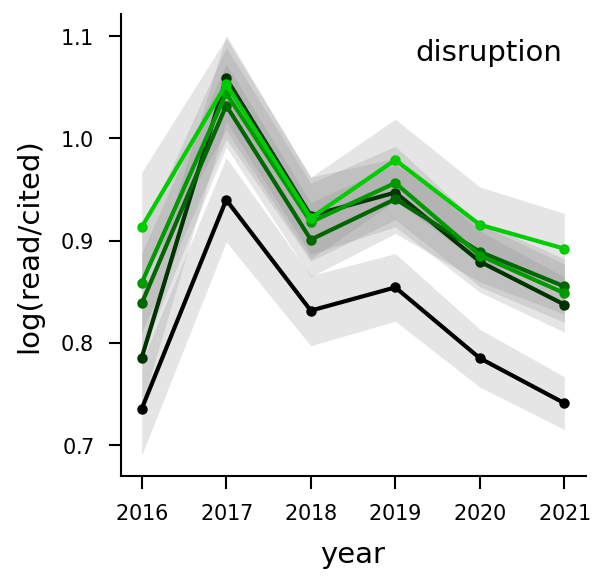

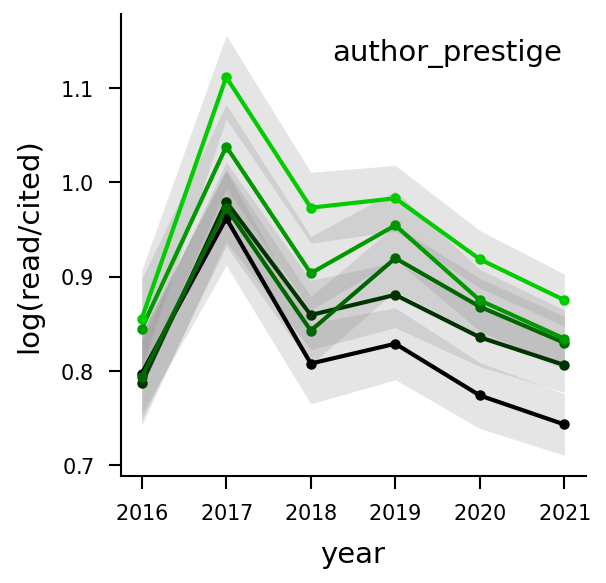

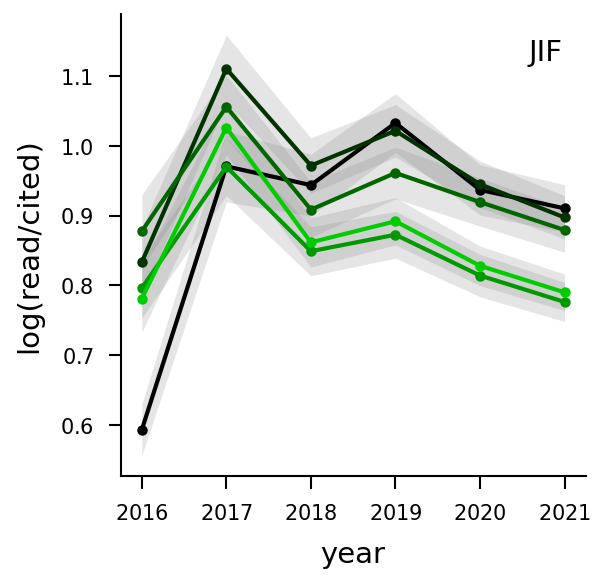

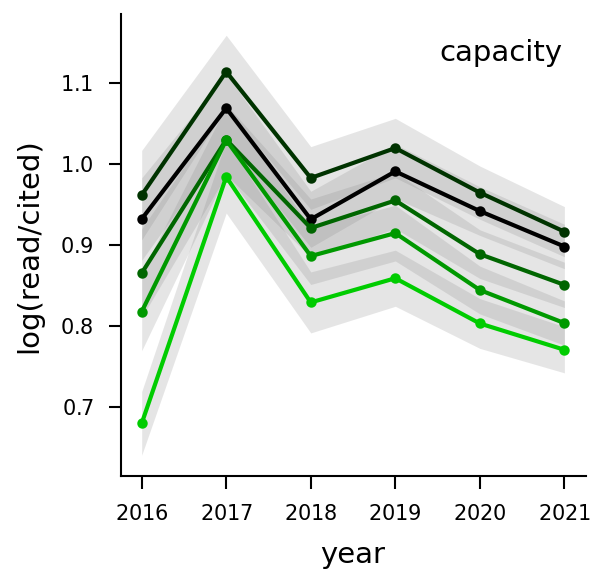

In [18]:
# disruption以外の3指標
papers_hcp['auth_prestige_bin'] = pd.qcut(papers_hcp['auth_prestige'],N_BINS, labels=bin_names)
papers_hcp['jif_bin'] = pd.qcut(papers_hcp['jif'],N_BINS, labels=bin_names)
papers_hcp['capacity_bin'] = pd.qcut(papers_hcp['capacity'],N_BINS, labels=bin_names)


for col,title in zip(['D_nok_bin','auth_prestige_bin','jif_bin','capacity_bin'],['disruption','author_prestige','JIF','capacity']):
    fig,ax = plt.subplots(figsize=(2,2))
    
    ax.text(0.95, 0.9, title, transform=ax.transAxes, ha='right', fontsize=7)
    for i,name in enumerate(bin_names):
        df = papers_hcp[papers_hcp[col]==name].query('100 < c_history_sum < 110')
        
        means,confs = [],[]
        for year in years:
            mean, conf = get_conf(df[f'read_percite_{year}'].map(lambda x: np.log(x+1)).values)
            means.append(mean)
            confs.append(conf)
        means = np.array(means)
        confs = np.array(confs)
        
        ax.plot(years,means,marker='.',label=name,color=(0, i/N_BINS, 0))
        ax.fill_between(years,means-confs,means+confs, alpha=0.2,color='gray', linewidth=0)
    
    ax.set_xlabel('year',fontsize=7)
    ax.set_ylabel('log(read/cited)',fontsize=7)
    # ax.legend(title=col,title_fontsize=4,fontsize=4)
    plt.savefig(f'./hcp_read_percite_{title}.pdf')
    plt.show()